<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_10_Pandas Applying Functions.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## 🟩 Convert Date to String (2.10.1)

In [5]:
df_date = df.copy()
df_date['job_posted_date_str'] = df_date['job_posted_date'].apply(lambda x: x.strftime('%Y-%m-%d'))
df_date[['job_posted_date_str', 'job_posted_date']].head()

'2023-06-16'

---

## 🟨 Days Since Posted (2.10.2)

In [10]:
import datetime

df_current = df.copy()
df_current['days_since_posted'] = df_current['job_posted_date'].apply(lambda day: (datetime.datetime.now() - day).days)
print(datetime.datetime.now())
df_current[['days_since_posted', 'job_posted_date']].head()



2024-07-26 11:50:25.348067


,days_since_posted,job_posted_date
0,405,2023-06-16 13:44:15
1,558,2023-01-14 13:18:07
2,289,2023-10-10 13:14:55
3,387,2023-07-04 13:01:41
4,353,2023-08-07 14:29:36


---

## 🟥 Salary Category (2.10.3)

     salary_year_avg salary_category
28          109500.0            high
77          140000.0            high
92          120000.0            high
100         228222.0            high
109          89000.0          medium
116         114000.0            high
146         129500.0            high
180          90250.0          medium
212         157500.0            high
257         103128.0            high
307         185000.0            high
339         195000.0            high
380          97500.0          medium
388          89000.0          medium
410         133285.0            high
450         157500.0            high
495         168500.0            high
520          63000.0          medium
545          80000.0          medium
571         110000.0            high


<Axes: xlabel='salary_category'>

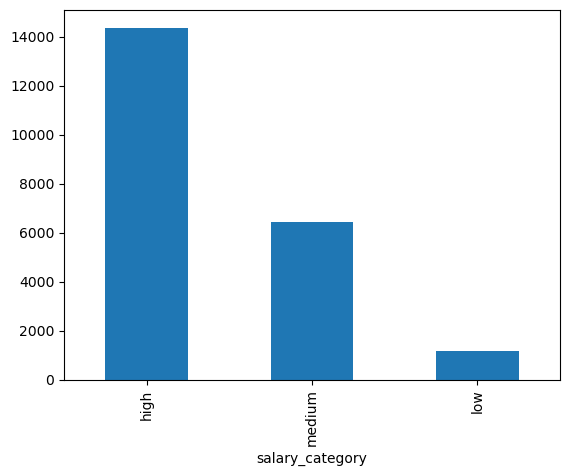

In [20]:
df_filtered = df[pd.notna(df['salary_year_avg'])].copy()
df_filtered['salary_category'] = df_filtered['salary_year_avg'].apply(lambda salary: 'low' if salary < 60000 else 'medium' if salary >= 60000 and salary < 100000 else 'high')
print(df_filtered[['salary_year_avg', 'salary_category']].head(20))
df_filtered['salary_category'].value_counts().plot(kind='bar')

---